By **Difa F. Hakim**

---



---



#1. Installing PySCF

In [1]:
!pip install pyscf==2.11.0

#2. H-atom input file

In [2]:
from pyscf import gto, scf

# Define the molecule (Hydrogen atom)
mol = gto.Mole()
mol.atom = 'H 0 0 0'  # Hydrogen at the origin
mol.basis = 'STO-3G'   # Minimal basis set
mol.spin = 1           # Spin-polarized (unpaired electron)
mol.build()

# Perform Restricted Open-Shell Hartree-Fock (ROHF) calculation
mf = scf.ROHF(mol)
mf.kernel()  # Run the calculation

# Print results
print(f"Total Energy for Hydrogen Atom with STO-3G (Hartree): {mf.e_tot}")

converged SCF energy = -0.466581849557275
Total Energy for Hydrogen Atom with STO-3G (Hartree): -0.46658184955727533


#3. Helium-input file

## 4. a)Hartree-Fock/STO-3G for He

In [3]:
from pyscf import gto, scf

# Define the molecule (Helium atom)
mol = gto.Mole()
mol.atom = 'He 0 0 0'  # Helium at the origin
mol.basis = 'sto-3G'   # Minimal basis set
mol.charge = 0         # Neutral helium
mol.spin = 0           # Closed-shell (all electrons paired)
mol.build()

# Perform Restricted Hartree-Fock (RHF) calculation
mf = scf.RHF(mol)
mf.kernel()  # Run the calculation

# Print results
print("\n--- Hartree-Fock (STO-3G) Results for Helium Atom ---")
print(f"Total Energy (Hartree): {mf.e_tot}")

converged SCF energy = -2.80778395753997

--- Hartree-Fock (STO-3G) Results for Helium Atom ---
Total Energy (Hartree): -2.807783957539974


##5. b)Full Configuration Interaction/cc-pV5Z for He

In [4]:
from pyscf import gto, scf, fci

# Define the molecule (Helium atom)
mol = gto.Mole()
mol.atom = 'He 0 0 0'  # Helium at the origin
mol.basis = 'cc-pV5Z'    # Minimal basis set
mol.charge = 0          # Neutral helium
mol.spin = 0            # Closed-shell (all electrons paired)
mol.build()

# Run Hartree-Fock (HF) first to get MOs
mf = scf.RHF(mol)
mf.kernel()

# Perform Full CI (FCI) calculation
cisolver = fci.FCI(mol, mf.mo_coeff)
fci_energy, fci_vec = cisolver.kernel()

# Print results
print("\n--- FCI/cc-pV5Z Results for Helium Atom ---")
print(f"FCI Energy (cc-pV5Z): {fci_energy}")

converged SCF energy = -2.86162483458191

--- FCI/cc-pV5Z Results for Helium Atom ---
FCI Energy (cc-pV5Z): -2.903151884048928


#6. H2 input file

##7. a)Hartree-Fock/STO-3G for H2

In [5]:
from pyscf import gto, scf

# Define molecular system
mol = gto.Mole()
mol.atom = '''
H 0 0 0
H 0 0 1.4
'''
mol.basis = 'sto-3g'
mol.charge = 0
mol.spin = 0  # singlet
mol.build()

# Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Print results
print("\nHF/STO-3G calculation for H2 at R=1.4 bohr")
print("Total Energy (Hartree):", mf.e_tot)

converged SCF energy = -0.941480654707799

HF/STO-3G calculation for H2 at R=1.4 bohr
Total Energy (Hartree): -0.9414806547077987


##7. b)Full Configuration Interaction/STO-3G for H2

In [6]:
from pyscf import gto, scf, fci

# Define molecular system
mol = gto.Mole()
mol.atom = '''
H 0 0 0.000
H 0 0 1.400
'''
mol.basis = 'sto-3G'
mol.charge = 0
mol.spin = 0  # singlet
mol.unit = 'Bohr'
mol.build()

# Perform Hartree-Fock calculation first
mf = scf.RHF(mol)
mf.kernel()

# Perform Full CI calculation
cisolver = fci.FCI(mol, mf.mo_coeff)
fci_energy_sto3gH2 = cisolver.kernel()[0]

# Print results
print("\nFCI/sto-3g calculation for H2 at R=1.4 bohr")
print("FCI Energy (Hartree):", fci_energy_sto3gH2)

converged SCF energy = -1.11671432506255

FCI/sto-3g calculation for H2 at R=1.4 bohr
FCI Energy (Hartree): -1.1372759436170439


##8. b)Full Configuration Interaction/cc-pV5Z for H2

In [7]:
from pyscf import gto, scf, fci

# Define molecular system
mol = gto.Mole()
mol.atom = '''
H 0 0 0.000
H 0 0 1.400
'''
mol.basis = 'cc-pVQZ'  # Very large basis set for high accuracy
mol.charge = 0
mol.spin = 0  # singlet
mol.unit = 'Bohr'
mol.build()

# Perform Hartree-Fock calculation first
mf = scf.RHF(mol)
mf.kernel()

# Perform Full CI calculation
cisolver = fci.FCI(mol, mf.mo_coeff)
fci_energy = cisolver.kernel()[0]

# Print results
print("\nFCI/cc-pV5Z calculation for H2 at R=1.4 bohr")
print("FCI Energy (Hartree):", fci_energy)

converged SCF energy = -1.13345903359425

FCI/cc-pV5Z calculation for H2 at R=1.4 bohr
FCI Energy (Hartree): -1.1737957922495057


#9. H2: 2nd Quantization Hamiltonian

In [8]:
!pip install pyscf==2.11.0 qiskit==1.4.5 qiskit-nature==0.7.2 qiskit-aer==0.17.2 pylatexenc

In [9]:
import numpy as np
import pandas as pd

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import UCC, HartreeFock

from qiskit import transpile
from qiskit_algorithms import NumPyMinimumEigensolver, VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as AerEstimator

from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit

In [10]:
def UCCSD_decompose(ansatz):

    N_iter = len(ansatz.decompose(reps=2).data)
    num_qubit = ansatz.num_qubits
    for i in range(N_iter):
        new_qc = QuantumCircuit(num_qubit)
        instruction = ansatz.decompose(reps=2).data[i]
        name = ansatz.decompose(reps=2).data[i][0].name
        print(i, name)
        new_qc.append(instruction)
        display(new_qc.decompose().draw('mpl'))

In [11]:
H2_driver = PySCFDriver(
        atom='H 0 0 0; H 0 0 1.4',
        basis='sto3g',
        charge=0,
        spin=0,
        unit=DistanceUnit.BOHR,
    )

In [12]:
problem = H2_driver.run()
hamiltonian = problem.hamiltonian
second_q_op = hamiltonian.second_q_op()
enuc = hamiltonian.nuclear_repulsion_energy

print(second_q_op,'\n')

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.2527970618358173 * ( +_0 -_0 )
+ -0.4756022993742511 * ( +_1 -_1 )
+ -1.2527970618358173 * ( +_2 -_2 )
+ -0.4756022993742511 * ( +_3 -_3 )
+ 0.3372970421616846 * ( +_0 +_0 -_0 -_0 )
+ 0.3317819956102741 * ( +_0 +_1 -_1 -_0 )
+ 0.3372970421616846 * ( +_0 +_2 -_2 -_0 )
+ 0.3317819956102741 * ( +_0 +_3 -_3 -_0 )
+ 0.0906289573965542 * ( +_0 +_0 -_1 -_1 )
+ 0.0906289573965542 * ( +_0 +_1 -_0 -_1 )
+ 0.0906289573965542 * ( +_0 +_2 -_3 -_1 )
+ 0.0906289573965542 * ( +_0 +_3 -_2 -_1 )
+ 0.0906289573965542 * ( +_1 +_0 -_1 -_0 )
+ 0.0906289573965542 * ( +_1 +_1 -_0 -_0 )
+ 0.0906289573965542 * ( +_1 +_2 -_3 -_0 )
+ 0.0906289573965542 * ( +_1 +_3 -_2 -_0 )
+ 0.3317819956102741 * ( +_1 +_0 -_0 -_1 )
+ 0.34874767334009116 * ( +_1 +_1 -_1 -_1 )
+ 0.3317819956102741 * ( +_1 +_2 -_2 -_1 )
+ 0.34874767334009116 * ( +_1 +_3 -_3 -_1 )
+ 0.3372970421616846 * ( +_2 +_0 -_0 -_2 )
+ 0.3317819956102741 * ( +_2 +_1 -_1 -_2 )
+ 0.3372970421616846 

#10. H2: Qubit Hamiltonian

In [13]:
num_spatial_orbitals = problem.num_spatial_orbitals
num_particles = problem._num_particles
qubit = JordanWignerMapper().map(second_q_ops = second_q_op)
n_qubit = qubit.num_qubits
print(qubit.to_list(array=True))

[('IIII', -0.81244197+0.j) ('IIIZ',  0.17128249+0.j)
 ('IIZI', -0.2230402 +0.j) ('IZII',  0.17128249+0.j)
 ('ZIII', -0.2230402 +0.j) ('IIZZ',  0.12057652+0.j)
 ('IZIZ',  0.16864852+0.j) ('ZIIZ',  0.165891  +0.j)
 ('YYYY',  0.04531448+0.j) ('XXYY',  0.04531448+0.j)
 ('YYXX',  0.04531448+0.j) ('XXXX',  0.04531448+0.j)
 ('IZZI',  0.165891  +0.j) ('ZIZI',  0.17437384+0.j)
 ('ZZII',  0.12057652+0.j)]


#11. Classical/Numpy solver

In [14]:
numpy_solver = NumPyMinimumEigensolver()
np_result = numpy_solver.compute_minimum_eigenvalue(operator=qubit)
E_np = np_result.eigenvalue.real
E_total = E_np + enuc

print('Numpy Energy:',E_total)

Numpy Energy: -1.1372759436170439


#12. H2: Hardware-Efficient Ansatz

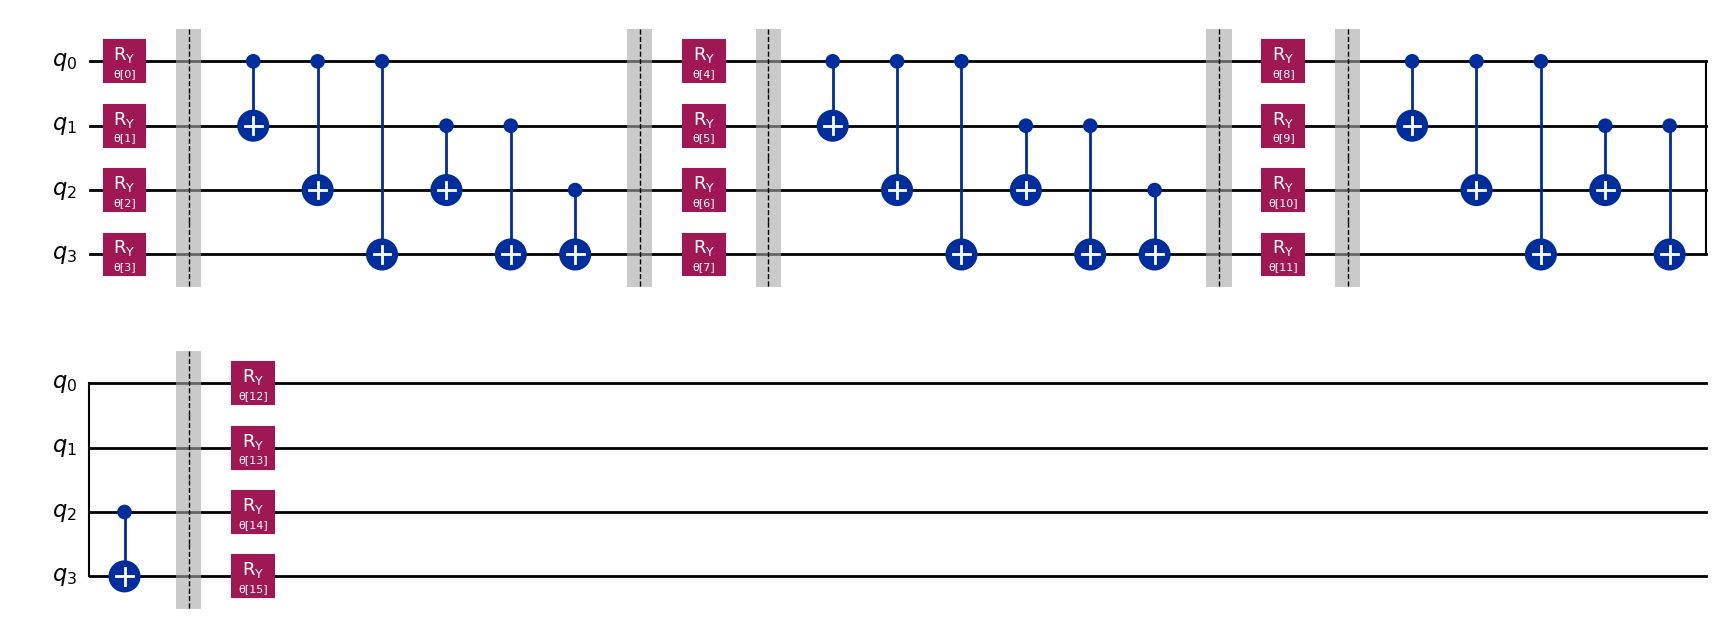

In [15]:
ansatz_HEA = TwoLocal(
                 num_qubits=n_qubit,
                 rotation_blocks="ry",
                 entanglement_blocks="cx",
                 entanglement='full',
                 reps=3,
                 insert_barriers=True,
                 parameter_prefix='θ')

# Transform quantum circuit into standard gate of specific quantum device/ simulator
backend = AerSimulator()
ansatz_HEA_t = transpile(ansatz_HEA,
                           backend=backend,
                           optimization_level=3)

vqe_HEA = VQE(AerEstimator(), ansatz_HEA_t, COBYLA())
res_HEA = vqe_HEA.compute_minimum_eigenvalue(operator=qubit)
display(ansatz_HEA_t.draw('mpl'))

#13. H2: UCCSD

In [16]:
ansatz_UCCSD = UCC(
        num_spatial_orbitals,
        num_particles,
        'sd',
        JordanWignerMapper(),
        initial_state=HartreeFock(
            num_spatial_orbitals,
            num_particles,JordanWignerMapper()))

ansatz_UCCSD_t = transpile(ansatz_UCCSD,
                           backend=backend,
                           optimization_level=3)

vqe_UCCSD = VQE(AerEstimator(),
                ansatz_UCCSD_t,
                COBYLA())
res_UCCSD = vqe_UCCSD.compute_minimum_eigenvalue(operator=qubit)

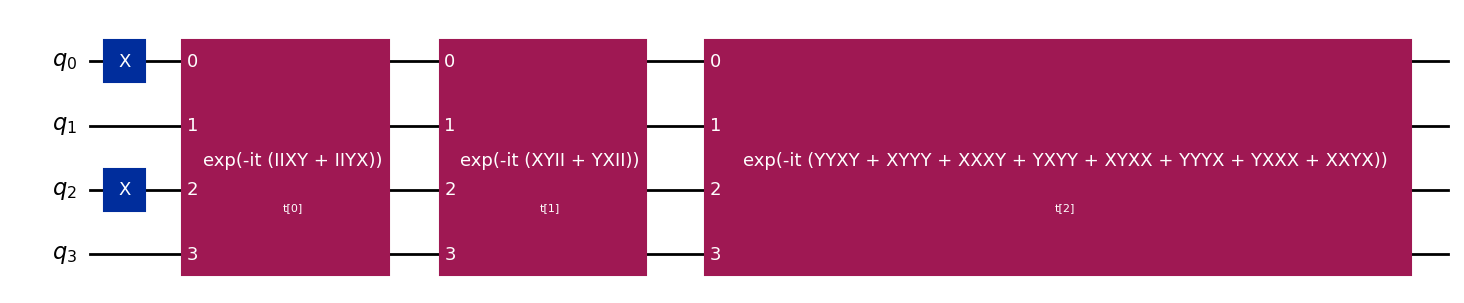

In [17]:
ansatz_UCCSD.decompose().draw('mpl')

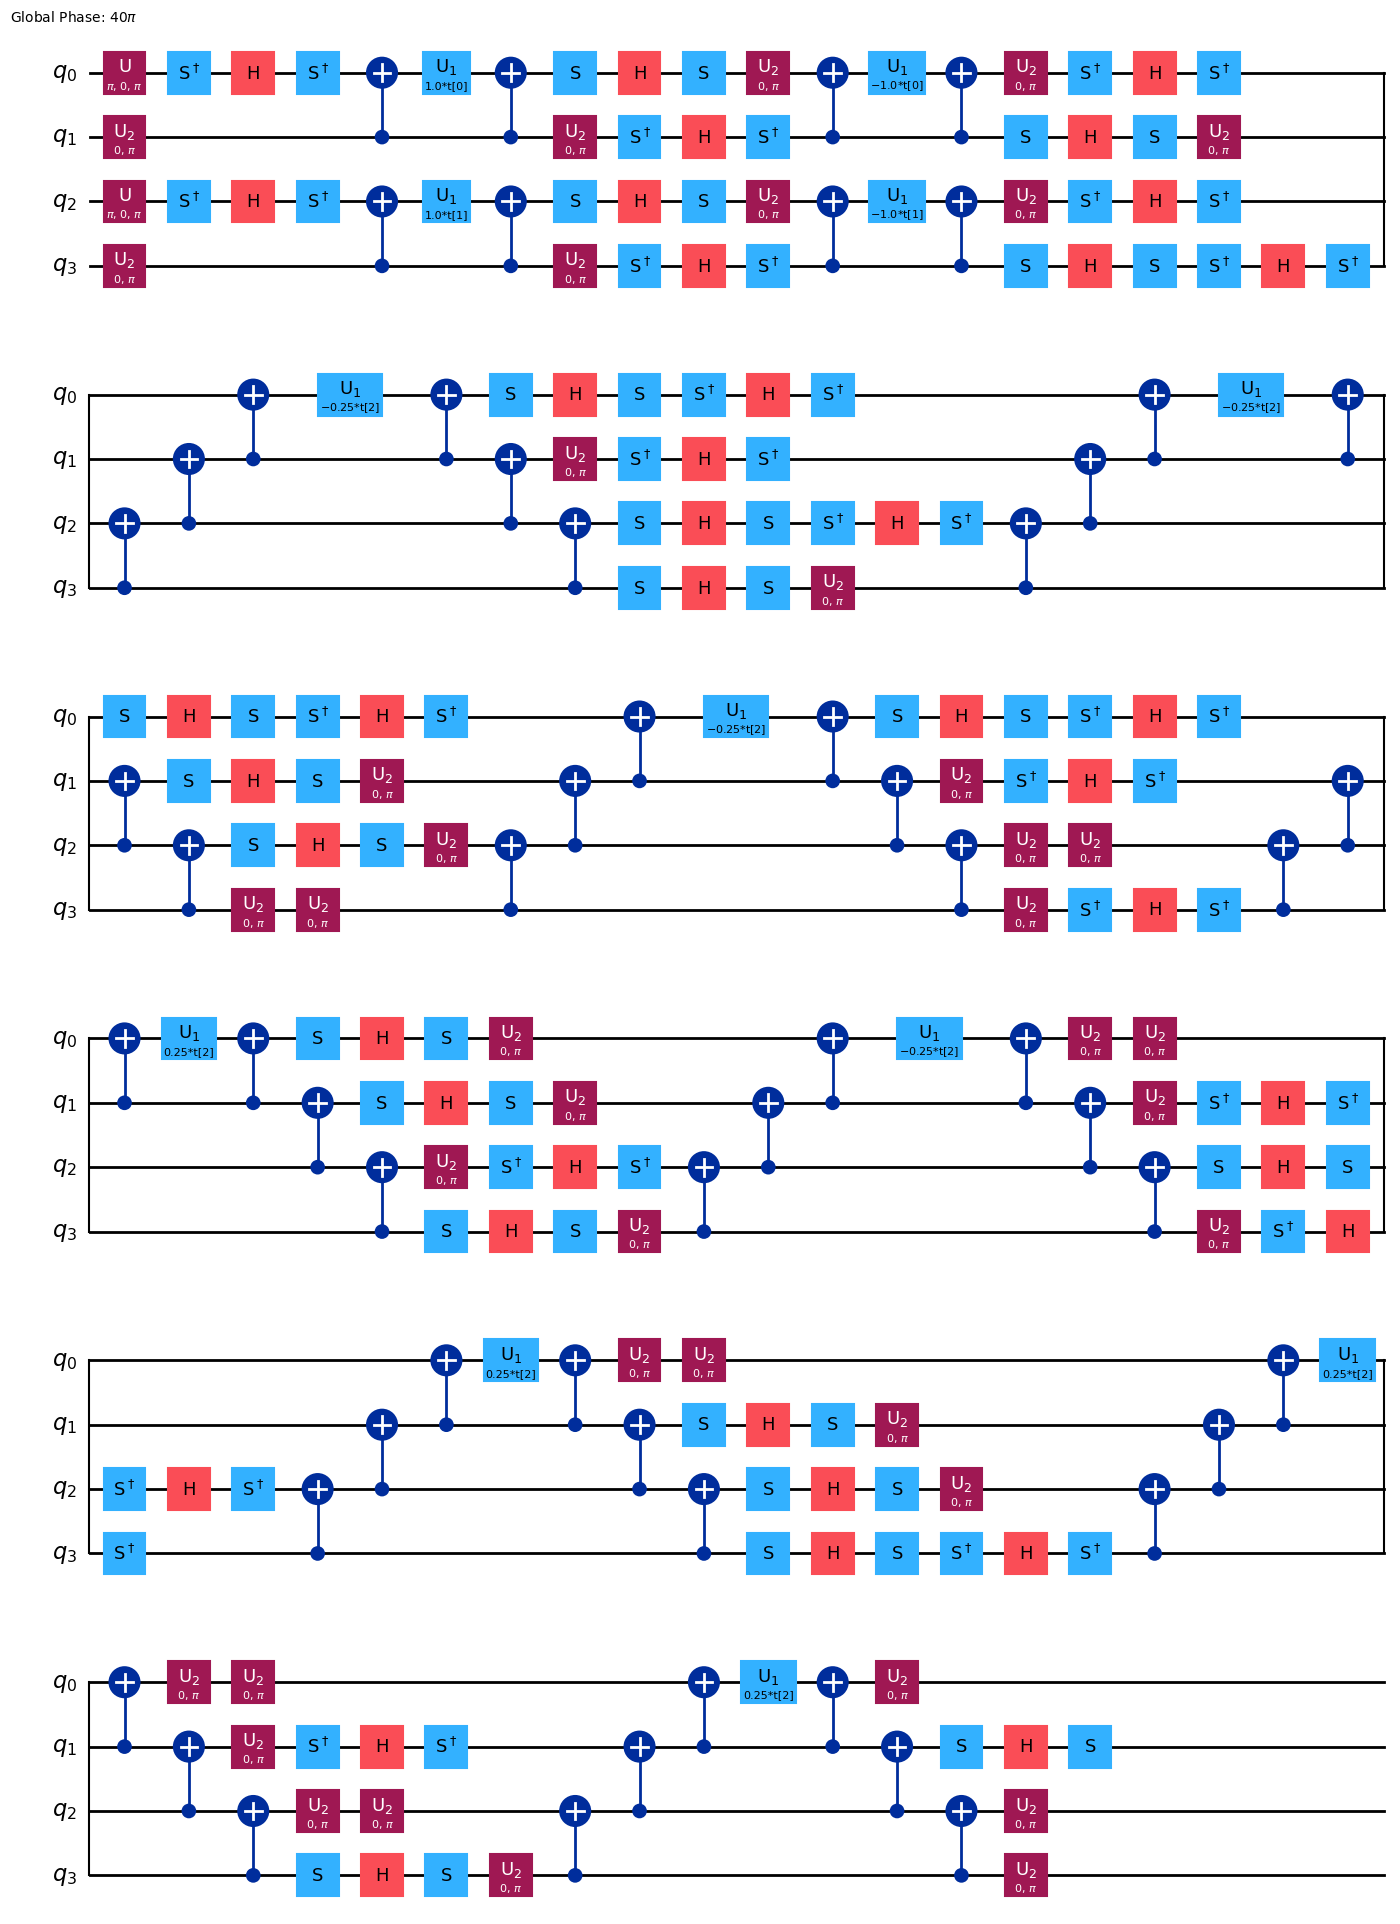

In [18]:
ansatz_UCCSD.decompose(reps=3).draw('mpl', fold=20)

#14. Comparison of Results

In [19]:
E_HEA = res_HEA.optimal_value + enuc
print('HEA Energy:',E_HEA)
print(res_HEA._optimal_point)

E_UCCSD = res_UCCSD.optimal_value + enuc
print('UCCSD Energy :',E_UCCSD)

HEA Energy: -1.1167143196759728
[-3.14151186e+00  6.28325789e+00 -2.11069564e+00  1.15929826e+00
  6.28312785e+00  5.54983858e+00  2.45019554e+00  6.16090071e-01
 -2.48889651e-04  3.24031077e+00  6.15729823e+00 -4.03190821e+00
  6.28341960e+00 -7.80959291e-01  3.69046659e+00  1.57087756e+00]
UCCSD Energy : -1.1372759422983743


In [20]:
method_list = ['FCI','Numpy','HEA','UCCSD']
res_list = [fci_energy_sto3gH2, E_total,E_HEA,E_UCCSD]

data = {
    'Method' : method_list,
    'Result' : res_list,
}

df = pd.DataFrame(data)
df.round(6)

,Method,Result
0,FCI,-1.137276
1,Numpy,-1.137276
2,HEA,-1.116714
3,UCCSD,-1.137276


In [21]:
import pyscf, qiskit, qiskit_nature, qiskit_aer, sys
txt = '{:15} : {:}'
print('Library Information')
print(txt.format('Python',sys.version.split()[0]))
print(txt.format('Numpy', np.__version__))
print(txt.format('PySCF', pyscf.__version__))
print(txt.format('Qiskit', qiskit.__version__))
print(txt.format('Qiskit Nature', qiskit_nature.__version__))
print(txt.format('Qiskit Aer', qiskit_aer.__version__))

Library Information
Python          : 3.12.12
Numpy           : 2.0.2
PySCF           : 2.11.0
Qiskit          : 1.4.5
Qiskit Nature   : 0.7.2
Qiskit Aer      : 0.17.2
